# AppGPS


### What makes people to like or dislike an App in the category communication of Google Play Store?


### What characterize the description of best ranket Apps


In [11]:
import json

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from pygments import highlight

from pygments.lexers import JsonLexer

from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline

%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# libraries from https://curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/

# Natural Language Toolkit (NLTK)

from bs4 import BeautifulSoup
import requests
from tqdm.notebook import trange, tqdm


In [12]:
# Get the list of the apps
# scrape the main page of GPS


url = "https://play.google.com/store/apps/collection/cluster?clp=ogooCAEaHAoWcmVjc190b3BpY18yeHFtSWFsRGswRRA7GAMqAggBUgIIAg%3D%3D:S:ANO1ljJbU0o&gsr=CiuiCigIARocChZyZWNzX3RvcGljXzJ4cW1JYWxEazBFEDsYAyoCCAFSAggC:S:ANO1ljJ1lOk"
response= requests.get(url)
response.status_code

soup = BeautifulSoup(response.content, "html.parser")


<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v2.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="xOdYWWXxf2kMQYXNVkj7+g">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*"],"FdrFJe":"8471886930569564651","GWsdKe":"en-US","Im6cmf":"/_/PlayStoreUi","LVIXXb":1,"LoQv7e":false,"MT7f9b":["Fho1U","Ngbm"],"QEwZ9c":"%.@.[10,[10,50]\n]\n,true,null,[96,27,4,8,57,30,110,11,16,49,1,3,9,12,104,55,56,51,10,34,31,145]\n,[null,null,null,[[[[7,1]\n,[[1,73,96,103,58,92,52,112,69,19,31,101,123,74,49,80,20,10,14,79,43]\n]\n]\n,[[7,31]\n,[[1,73,96,103,58,92,52,112,69,19,31,101,123,74,49,80,20,10,14,79,43]\n]\n]\n,[[7,104]\n,[[1,73,96,103,58,92,
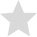
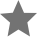
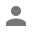
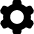
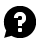
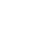
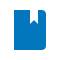
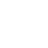
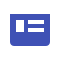
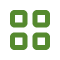
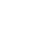
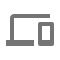
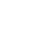
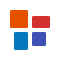
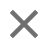
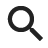
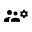
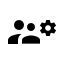
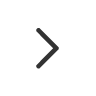
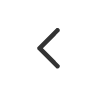
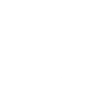
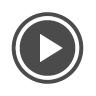
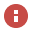
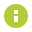
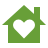
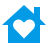
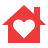
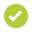
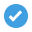
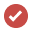

In [13]:
print(soup.prettify())

In [14]:
place = soup.select(".poRVub")

In [15]:
place

[<a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.android.chrome" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.microsoft.office.outlook" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=jp.naver.line.android" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=org.thoughtcrime.securesms" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=sg.bigo.live" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.yahoo.mobile.client.android.mail" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.facebook.orca" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.discord" tabindex="-1"></a>,
 <a aria-hidden="true" class="poRVub" href="/store/apps/details?id=com.truecaller" tabindex="-1"></a>,
 <a aria-hidden=

In [16]:
# get the name of all apps
link_list = []

for item in range(len(place)):
    link_list.append(soup.select(".poRVub")[item].get("href"))

#
  

In [17]:
link_list

['/store/apps/details?id=com.android.chrome',
 '/store/apps/details?id=com.microsoft.office.outlook',
 '/store/apps/details?id=jp.naver.line.android',
 '/store/apps/details?id=org.thoughtcrime.securesms',
 '/store/apps/details?id=sg.bigo.live',
 '/store/apps/details?id=com.yahoo.mobile.client.android.mail',
 '/store/apps/details?id=com.facebook.orca',
 '/store/apps/details?id=com.discord',
 '/store/apps/details?id=com.truecaller',
 '/store/apps/details?id=com.viber.voip',
 '/store/apps/details?id=com.whatsapp',
 '/store/apps/details?id=com.google.android.apps.tachyon',
 '/store/apps/details?id=com.enflick.android.TextNow',
 '/store/apps/details?id=com.google.android.apps.meetings',
 '/store/apps/details?id=com.snapchat.android',
 '/store/apps/details?id=com.duckduckgo.mobile.android',
 '/store/apps/details?id=com.plato.android',
 '/store/apps/details?id=com.google.android.gm',
 '/store/apps/details?id=com.whatsapp.w4b',
 '/store/apps/details?id=com.google.android.apps.messaging',
 '/st

In [18]:
# Get the text after the = for each app
len(link_list) # 50 apps that appear i nGPS main page of communication category
list_names = [s.replace('/store/apps/details?id=', '') for s in link_list]
list_names

['com.android.chrome',
 'com.microsoft.office.outlook',
 'jp.naver.line.android',
 'org.thoughtcrime.securesms',
 'sg.bigo.live',
 'com.yahoo.mobile.client.android.mail',
 'com.facebook.orca',
 'com.discord',
 'com.truecaller',
 'com.viber.voip',
 'com.whatsapp',
 'com.google.android.apps.tachyon',
 'com.enflick.android.TextNow',
 'com.google.android.apps.meetings',
 'com.snapchat.android',
 'com.duckduckgo.mobile.android',
 'com.plato.android',
 'com.google.android.gm',
 'com.whatsapp.w4b',
 'com.google.android.apps.messaging',
 'com.skype.raider',
 'com.chat.ruletka',
 'com.google.android.apps.searchlite',
 'com.facebook.mlite',
 'org.mozilla.firefox',
 'com.microsoft.emmx',
 'com.sec.android.app.sbrowser',
 'com.samsung.android.email.provider',
 'org.telegram.messenger',
 'sg.bigo.hellotalk',
 'com.facebook.talk',
 'ru.mail.mailapp',
 'net.idt.um.android.bossrevapp',
 'com.callapp.contacts',
 'com.google.android.apps.googlevoice',
 'omegle.tv',
 'com.hsv.freeadblockerbrowser',
 'com

In [19]:
#save the list ot appIds to a csv file to avoid the scraping of the apps again. 

df_list_appIds = pd.DataFrame(list_names)
df_list_appIds.to_csv("list_appIds.csv", index= False)
df_list_appIds 
# note this list has to be restore 

,0
0,com.android.chrome
1,com.microsoft.office.outlook
2,jp.naver.line.android
3,org.thoughtcrime.securesms
4,sg.bigo.live
5,com.yahoo.mobile.client.android.mail
6,com.facebook.orca
7,com.discord
8,com.truecaller
9,com.viber.voip


### Scrape the list information
* continue... https://curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/

In [11]:
app_infos = []

for ap in tqdm(list_names):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

  0%|          | 0/50 [00:00<?, ?it/s]

In [45]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )

    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [13]:
print_json(app_infos[ : ])

[
  {
    "adSupported": null,
    "androidVersion": "Varies",
    "androidVersionText": "Varies with device",
    "appId": "com.android.chrome",
    "containsAds": false,
    "contentRating": "Everyone",
    "contentRatingDescription": null,
    "currency": "USD",
    "description": "Google Chrome is a fast, easy to use, and secure web browser. Designed for Android, Chrome brings you personalized news articles, quick links to your favorite sites, downloads, and Google Search and Google Translate built-in. Download now to enjoy the same Chrome web browser experience you love across all your devices.\r\n        \r\n        <b>Browse fast and type less.</b> Choose from personalized search results that instantly appear as you type and quickly browse previously visited web pages. Fill in forms quickly with Autofill.\r\n        \r\n        <b>Incognito Browsing.</b> Use Incognito mode to browse the internet without saving your history. Browse privately across all your devices.\r\n        \r

In [14]:
app_infos_df = pd.DataFrame(app_infos)

In [16]:
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,Google Chrome: Fast & Secure,"Google Chrome is a fast, easy to use, and secu...","Google Chrome is a fast, easy to use, and secu...","Fast, simple, and secure. Google Chrome browse...","Fast, simple, and secure. Google Chrome browse...","5,000,000,000+",5000000000,4.132675,28762235,8852170,...,None,False,"Feb 7, 2012",1614720867,Varies with device,Thanks for choosing Chrome! This release inclu...,Thanks for choosing Chrome! This release inclu...,False,com.android.chrome,https://play.google.com/store/apps/details?id=...
1,WhatsApp Messenger,WhatsApp from Facebook\r\n\r\nWhatsApp Messeng...,WhatsApp from Facebook<br><br>WhatsApp Messeng...,Simple. Personal. Secure.,Simple. Personal. Secure.,"5,000,000,000+",5000000000,4.392398,7831953,1656892,...,None,False,"Oct 18, 2010",1614370191,Varies with device,* You can now remove sound when sharing videos...,* You can now remove sound when sharing videos...,True,com.whatsapp,https://play.google.com/store/apps/details?id=...
2,"Microsoft Outlook: Secure email, calendars & f...",Microsoft Outlook keeps you connected and prot...,Microsoft Outlook keeps you connected and prot...,"Connect & protect your inbox, schedules and co...","Connect &amp; protect your inbox, schedules an...","100,000,000+",100000000,4.609208,5969177,1961560,...,True,True,"Jan 28, 2015",1614205520,4.2105.3,Start the new year with a new look -- just for...,Start the new year with a new look -- just for...,False,com.microsoft.office.outlook,https://play.google.com/store/apps/details?id=...
3,"BIGO LIVE–Live Stream, Live Chat, Go Live","Watch great live streams, enjoy live game stre...","Watch great live streams, enjoy live game stre...","👀Watch live stream, play multiplayer games.🤩Or...","👀Watch live stream, play multiplayer games.🤩Or...","100,000,000+",100000000,4.365717,4388813,1524883,...,None,False,"Mar 10, 2016",1612713867,5.0.3,"""Challenge Accepted"" is online Now! \r\nCome s...",&quot;Challenge Accepted&quot; is online Now! ...,False,sg.bigo.live,https://play.google.com/store/apps/details?id=...
4,Signal Private Messenger,Millions of people use Signal every day for fr...,Millions of people use Signal every day for fr...,Say “hello” to privacy.,Say “hello” to privacy.,"50,000,000+",50000000,4.463075,1404295,506839,...,None,False,"May 25, 2010",1614786225,5.4.7,\r\n★ Support for landscape video calling in o...,<br>★ Support for landscape video calling in o...,False,org.thoughtcrime.securesms,https://play.google.com/store/apps/details?id=...


In [17]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [43]:
data_info = pd.read_csv('apps.csv')
data_info.columns

Index(['title', 'description', 'descriptionHTML', 'summary', 'summaryHTML',
       'installs', 'minInstalls', 'score', 'ratings', 'reviews', 'histogram',
       'price', 'free', 'currency', 'sale', 'saleTime', 'originalPrice',
       'saleText', 'offersIAP', 'inAppProductPrice', 'size', 'androidVersion',
       'androidVersionText', 'developer', 'developerId', 'developerEmail',
       'developerWebsite', 'developerAddress', 'privacyPolicy',
       'developerInternalID', 'genre', 'genreId', 'icon', 'headerImage',
       'screenshots', 'video', 'videoImage', 'contentRating',
       'contentRatingDescription', 'adSupported', 'containsAds', 'released',
       'updated', 'version', 'recentChanges', 'recentChangesHTML',
       'editorsChoice', 'appId', 'url'],
      dtype='object')

# Scraping App Reviews

Requirements 
* Balanced amount of reviews getting data that belong to a range between 1 to 5 score
* The same amount of reviews from each apps.
* Note: we have to take care about the publication date. It may serve to explain some sociocultural influences. 

In [44]:
# open the list with the ids(names) of the apps

#list_ids_apps = pd.read_csv("list_appIds.csv")
#list_ids_apps

list_names

['com.android.chrome',
 'com.microsoft.office.outlook',
 'jp.naver.line.android',
 'org.thoughtcrime.securesms',
 'sg.bigo.live',
 'com.yahoo.mobile.client.android.mail',
 'com.facebook.orca',
 'com.discord',
 'com.truecaller',
 'com.viber.voip',
 'com.whatsapp',
 'com.google.android.apps.tachyon',
 'com.enflick.android.TextNow',
 'com.google.android.apps.meetings',
 'com.snapchat.android',
 'com.duckduckgo.mobile.android',
 'com.plato.android',
 'com.google.android.gm',
 'com.whatsapp.w4b',
 'com.google.android.apps.messaging',
 'com.skype.raider',
 'com.chat.ruletka',
 'com.google.android.apps.searchlite',
 'com.facebook.mlite',
 'org.mozilla.firefox',
 'com.microsoft.emmx',
 'com.sec.android.app.sbrowser',
 'com.samsung.android.email.provider',
 'org.telegram.messenger',
 'sg.bigo.hellotalk',
 'com.facebook.talk',
 'ru.mail.mailapp',
 'net.idt.um.android.bossrevapp',
 'com.callapp.contacts',
 'com.google.android.apps.googlevoice',
 'omegle.tv',
 'com.hsv.freeadblockerbrowser',
 'com

In [88]:
import json
print(len(app_reviews))
print_json(app_reviews[0])

1000
[
  {
    "at": "2021-03-04 09:20:00",
    "content": "I've used Chrome for years but the recent updates make it stop loading on a regular basis, and crash frequently, too. It's awful. Don't install until you see some reviews saying there are better releases. The stablity improvements are not stable! I don't like the new tab system, but could live with it if the browser was working.",
    "repliedAt": null,
    "replyContent": null,
    "reviewCreatedVersion": "89.0.4389.72",
    "reviewId": "gp:AOqpTOGgrAkn4D_xNn_G9zYwCZQ63qGabjwnxxREvp6t8YhZr72Qq6gHcuwQqOQNd_yXNC8dO8EXx37uNkeS2hw",
    "score": 1,
    "thumbsUpCount": 78,
    "userImage": "https://play-lh.googleusercontent.com/-XzaUulKESqE/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmToFrXFU5l-YRSRKs0KN7K5lOdlQ/photo.jpg",
    "userName": "Emma H"
  },
  {
    "at": "2021-03-03 17:03:18",
    "content": "Honestly mind-boggling how they manage to make Chrome less accessible with each update. Simple things like showing bookmarks or pinned sites

In [83]:
import json

In [87]:

print_json(app_reviews[0])

[
  {
    "at": "2021-03-04 09:20:00",
    "content": "I've used Chrome for years but the recent updates make it stop loading on a regular basis, and crash frequently, too. It's awful. Don't install until you see some reviews saying there are better releases. The stablity improvements are not stable! I don't like the new tab system, but could live with it if the browser was working.",
    "repliedAt": null,
    "replyContent": null,
    "reviewCreatedVersion": "89.0.4389.72",
    "reviewId": "gp:AOqpTOGgrAkn4D_xNn_G9zYwCZQ63qGabjwnxxREvp6t8YhZr72Qq6gHcuwQqOQNd_yXNC8dO8EXx37uNkeS2hw",
    "score": 1,
    "thumbsUpCount": 78,
    "userImage": "https://play-lh.googleusercontent.com/-XzaUulKESqE/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmToFrXFU5l-YRSRKs0KN7K5lOdlQ/photo.jpg",
    "userName": "Emma H"
  },
  {
    "at": "2021-03-03 17:03:18",
    "content": "Honestly mind-boggling how they manage to make Chrome less accessible with each update. Simple things like showing bookmarks or pinned sites on t

In [85]:
print_json(app_infos[ : ])

NameError: name 'print_json' is not defined

In [20]:
app_reviews = []

for ap in tqdm(list_names):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,       
                count= 200 if score == 3 else 100, #intentar con elif 100 if score == 1 ...
                filter_score_with=score
            )

            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

  0%|          | 0/50 [00:00<?, ?it/s]

In [49]:
# Check the review of a particular app
print(f" length of the reviews: {len(app_reviews)}")
print_json(app_reviews[2])

 length of the reviews: 59564
{
  "appId": "com.android.chrome",
  "at": "2021-03-05 19:19:02",
  "content": "I was super happy with Chrome for Android.This all changed immediately when the latest update, version 89, removed the feature on the discover feed.The ability to long press on articles in order to open them in a new tab is gone.Now you have to click the 3 dotted menu and THEN select Open in new tab. Changing the Chrome://flag setting does not fix this either. I'm not a happy user anymore and I'll be looking for a different browser if feature isn't reversed..!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "89.0.4389.72",
  "reviewId": "gp:AOqpTOF4vAlw-HNKL5xqhQOL6at6M0VFTUos-H4AS7qVhqEh11DwIEQ8JnNphXtM-l5hxsqzjB2fNsYaDX3HZDo",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 31,
  "userImage": "https://play-lh.googleusercontent.com/-HQJZsA_G3bQ/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucmePAUDEFFUaO9vjc0m2nmaohAmGg/photo.jpg",
  "userName": "Cristh

### Check the amoung of reviews in one selected apps
* looking if the API works fine 

In [25]:
list_names[1]

'com.microsoft.office.outlook'

In [26]:
# Check the amoung of reviews per selected apps

score_1 = []
score_2 = []
score_3 = []
score_4 = []
score_5 = []
for item in app_reviews: 
    if item["appId"] == "com.microsoft.office.outlook":
        if item["score"] == 3:
            score_3.append(item["score"])
        elif item["score"] == 5:
            score_5.append(item["score"])
        elif item["score"] == 1:
            score_1.append(item["score"])
        elif item["score"] == 2:
            score_2.append(item["score"])
        elif item["score"] == 4:
            score_4.append(item["score"])
print(f" 1.  {len(score_1)}")
print(f" 2.  {len(score_2)}")
print(f" 3.  {len(score_3)}")
print(f" 4.  {len(score_4)}")
print(f" 5.  {len(score_5)}")

 1.  200
 2.  200
 3.  400
 4.  200
 5.  200


In [27]:
# Check the amoung of reviews per selected selected app in relation with the total of reviews

app_1 = []
app_2 = []
for item in app_reviews:
    if item["appId"] == "com.microsoft.office.outlook":
        app_1.append(item["appId"])
    else:
        app_2.append(item["appId"])
     
print(f" 1.  {len(app_1)}")
print(f" 2.  {len(app_2)}")

 1.  1200
 2.  58364


In [221]:
app_2[30000]

'com.opera.mini.native'

In [28]:
score_5 = []

for item in app_reviews[0:1200]:
    if item["score"] == 1:
        score_5.append(item)
        

len(score_5)

# Convert the apss reviews to a DataFrame and save them as csv

In [32]:
app_review_df = pd.DataFrame(app_reviews)

In [33]:
app_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEiwKoXvSZGRPvzQi15ctf4SZWtmy9dEBcidyN...,KHUSHBAKHT KHAN,https://play-lh.googleusercontent.com/a-/AOh14...,"Just got the update, and now chrome has just s...",1,881,89.0.4389.72,2021-03-05 10:53:50,None,NaT,most_relevant,com.android.chrome
1,gp:AOqpTOHecP-Fo5vrtM6NuzGCDgziBFomftGOEuxstgQ...,Corina Bianca Gonteanu,https://play-lh.googleusercontent.com/a-/AOh14...,"I used to love this, but the grouped tabs are ...",1,570,89.0.4389.72,2021-03-06 20:56:06,None,NaT,most_relevant,com.android.chrome
2,gp:AOqpTOF4vAlw-HNKL5xqhQOL6at6M0VFTUos-H4AS7q...,Cristhian Gertner,https://play-lh.googleusercontent.com/-HQJZsA_...,I was super happy with Chrome for Android.This...,1,31,89.0.4389.72,2021-03-05 19:19:02,None,NaT,most_relevant,com.android.chrome
3,gp:AOqpTOGEv5sB6uUvLUkgTZ49lJAr9e9bkLI2sV09Pf4...,Serene Malaeb,https://play-lh.googleusercontent.com/-51k9d4c...,When I enter google on my phone and enter a ce...,1,148,89.0.4389.72,2021-03-04 09:21:44,None,NaT,most_relevant,com.android.chrome
4,gp:AOqpTOHM3s69f1sJ1PQgon-NgwXWqILSCdS1Wv_6KRO...,Siddarth Rahul,https://play-lh.googleusercontent.com/-GIyFg2p...,The new update is total BS. The tab layout is ...,1,41,89.0.4389.72,2021-03-05 13:20:29,None,NaT,most_relevant,com.android.chrome


In [35]:
app_review_df.shape

(59564, 12)

In [36]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59564 entries, 0 to 59563
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              59564 non-null  object        
 1   userName              59564 non-null  object        
 2   userImage             59564 non-null  object        
 3   content               59564 non-null  object        
 4   score                 59564 non-null  int64         
 5   thumbsUpCount         59564 non-null  int64         
 6   reviewCreatedVersion  51407 non-null  object        
 7   at                    59564 non-null  datetime64[ns]
 8   replyContent          16997 non-null  object        
 9   repliedAt             16997 non-null  datetime64[ns]
 10  sortOrder             59564 non-null  object        
 11  appId                 59564 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 5.5+ MB


In [37]:
# save the review's information into a csv to work with 
app_review_df.to_csv('GPL_app_review_df.csv', index=None, header=True)

In [39]:
# checking the csv file

data = pd.read_csv('GPL_app_review_df.csv')

In [41]:
data.shape

(59564, 12)

In [42]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEiwKoXvSZGRPvzQi15ctf4SZWtmy9dEBcidyN...,KHUSHBAKHT KHAN,https://play-lh.googleusercontent.com/a-/AOh14...,"Just got the update, and now chrome has just s...",1,881,89.0.4389.72,2021-03-05 10:53:50,NaN,NaN,most_relevant,com.android.chrome
1,gp:AOqpTOHecP-Fo5vrtM6NuzGCDgziBFomftGOEuxstgQ...,Corina Bianca Gonteanu,https://play-lh.googleusercontent.com/a-/AOh14...,"I used to love this, but the grouped tabs are ...",1,570,89.0.4389.72,2021-03-06 20:56:06,NaN,NaN,most_relevant,com.android.chrome
2,gp:AOqpTOF4vAlw-HNKL5xqhQOL6at6M0VFTUos-H4AS7q...,Cristhian Gertner,https://play-lh.googleusercontent.com/-HQJZsA_...,I was super happy with Chrome for Android.This...,1,31,89.0.4389.72,2021-03-05 19:19:02,NaN,NaN,most_relevant,com.android.chrome
3,gp:AOqpTOGEv5sB6uUvLUkgTZ49lJAr9e9bkLI2sV09Pf4...,Serene Malaeb,https://play-lh.googleusercontent.com/-51k9d4c...,When I enter google on my phone and enter a ce...,1,148,89.0.4389.72,2021-03-04 09:21:44,NaN,NaN,most_relevant,com.android.chrome
4,gp:AOqpTOHM3s69f1sJ1PQgon-NgwXWqILSCdS1Wv_6KRO...,Siddarth Rahul,https://play-lh.googleusercontent.com/-GIyFg2p...,The new update is total BS. The tab layout is ...,1,41,89.0.4389.72,2021-03-05 13:20:29,NaN,NaN,most_relevant,com.android.chrome
